<a href="https://colab.research.google.com/github/nayoung718/essa_python_1/blob/main/3_29_%EC%84%B8%EC%85%98_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **| 비지도 학습 연습 문제**
___
- 출처 : 핸즈온 머신러닝 Ch09 앙상블 학습과 랜덤 포레스트 연습문제 3, 5, 8, 10번
- 이론적 지식을 묻는 문제의 경우 텍스트 셀을 추가하여 정답을 적어주세요.

In [1]:
# import libraries
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### **1. k-평균을 사용할 때 적절한 클러스터 개수를 선택할 수 있는 두 가지 기법을 설명하세요.**
___



k평균을 사용할때 적절한 클러스터 개수 선택할 수 있는 방법에는 엘보 규칙과 클러스터 개수의 함수로 실루엣 점수를 그래프로 그리는 것입니다. 엘보 규칙의 경우, 클러스터 개수의 함수로 이너셔를 그리고 그래프에서 이너셔가 더는 빠르게 감소하지 않는 지점을 찾는 것입니다. 그리고 실루엣 점수를 그래프로 그린 경우, 그래프에 뾰족하게 올라간 지점을 찾는 것입니다.

### **2. 대규모 데이터셋으로 확장할 수 있는 군집 알고리즘 두 개를 말해보세요. 밀도가 높은 지역을 찾는 군집 알고리즘 두 개는 무엇인가요?**
___


대규모 데이터셋으로 확장할 수 있는 군집 알고리즘에는 K-Means 알고리즘과 BIRCH이 있고, 밀도가 높은 지역을 찾는 군집 알고리즘에는 DBSCAN과 평균-이동이 있습니다.

### **3. 가우시안 혼합이 무엇인가요? 어떤 작업에 사용할 수 있나요?**
___


가우시안 혼합 모델은 샘플이 파라미터를 모르는 몇 개의 가우시안 분포에서 생성되었다고 가정하는 확률 모델로 밀집도 추정, 군집, 이상치 탐지에 사용할 수 있습니다.

### **4. 다음 단계를 따라 올리베티 얼굴 데이터셋을 군집해보자..**
___
전통적인 올리베티 얼굴 데이터셋은 64 X 64 픽셀 크기의 흑백 얼굴 이미지 400개를 가지고 있습니다. 사람 40명의 사진을 10장씩 찍은 것인데, 각 이미지는 4096 크기의 1D 벡터로 펼쳐져 있습니다.

#### **STEP 1. 아래 코드를 실행하여 데이터셋을 불러오세요.**

In [2]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


####  **STEP 2. 데이터셋을 훈련 세트, 검증 세트, 테스트 세트로 나누세요.**
해당 데이터셋은 매우 작으므로, `StratifiedShuffleSplit` 함수를 이용하여, 계층적 샘플링으로 각 세트에 동일한 사람의 얼굴이 고루 섞이도록 하세요.

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

X = olivetti.data
y = olivetti.target

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_val_index, test_index in split.split(X, y):
    X_train_val, X_test = X[train_val_index], X[test_index]
    y_train_val, y_test = y[train_val_index], y[test_index]

for train_index, val_index in split.split(X_train_val, y_train_val):
    X_train, X_val = X_train_val[train_index], X_train_val[val_index]
    y_train, y_val = y_train_val[train_index], y_train_val[val_index]

####  **STEP 3. 속도를 높이기 위해 각 학습/검증/테스트 피처 데이터셋에 PCA을 적용하여 데이터의 차원을 줄이세요.**
- `n_componets = 0.99`로 설정합니다.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99, random_state=42)

X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

####  **STEP 4. 교재에서 다룬 방법을 사용하여 적절한 클러스터 개수를 찾고 k-평균을 사용해 이미지를 군집해보세요.**

In [5]:
#엘보 이용
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []

for k in range(2, 21):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(X_train_pca)
  inertia.append(kmeans.inertia_)

  # Silhouette Score
  cluster_labels = kmeans.predict(X_train_pca)
  silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
  silhouette_scores.append(silhouette_avg)

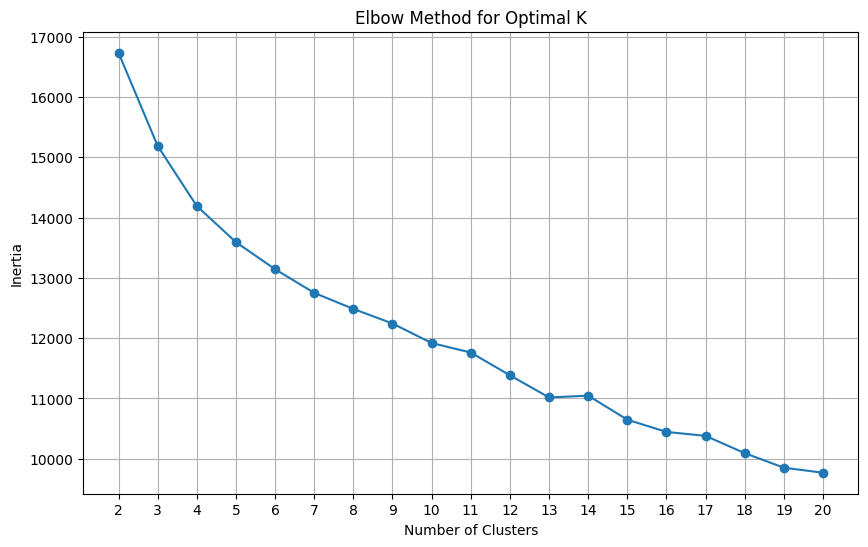

In [6]:
# 엘보 그래프
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(2, 21))
plt.grid(True)
plt.show()

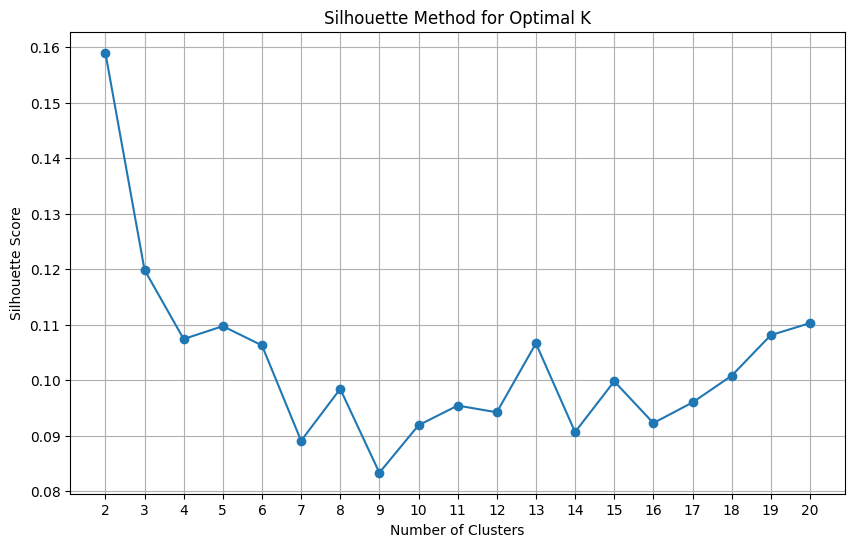

적절한 클러스터 개수: 2


In [7]:
# Silhouette 그래프
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 21))
plt.grid(True)
plt.show()

# 적절한 클러스터 개수 선택
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print("적절한 클러스터 개수:", optimal_k)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


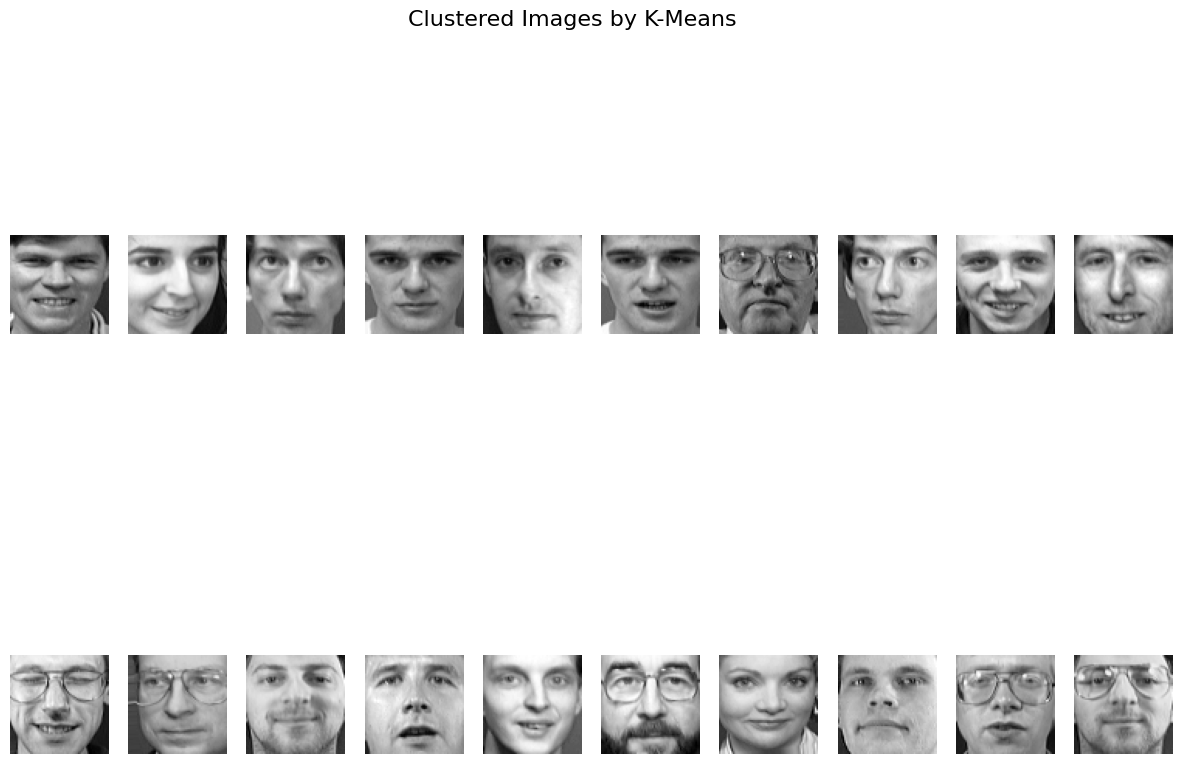

In [8]:
# k-평균 알고리즘을 사용하여 이미지 군집화
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_pca)

# 군집화된 이미지 출력
plt.figure(figsize=(15, 10))
for i in range(optimal_k):
    cluster_samples = X_train[cluster_labels == i]
    for j in range(10):  # 각 군집에서 10개의 이미지만 출력
        plt.subplot(optimal_k, 10, i*10 + j + 1)
        plt.imshow(cluster_samples[j].reshape(64, 64), cmap='gray')
        plt.axis('off')
plt.suptitle('Clustered Images by K-Means', fontsize=16)
plt.show()

####  **STEP 5. 아래 `plot_faces` 함수를 이용하여, 클러스터를 시각화하고, 각 클러스터에 비슷한 얼굴이 들어있는지 확인해보세요.**

-> 얼추 비슷해보이는 것 같음 하지만 종종 다른게 꽤 많음. 정확도는 높지 않을듯.

In [9]:
# plot_faces 함수
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

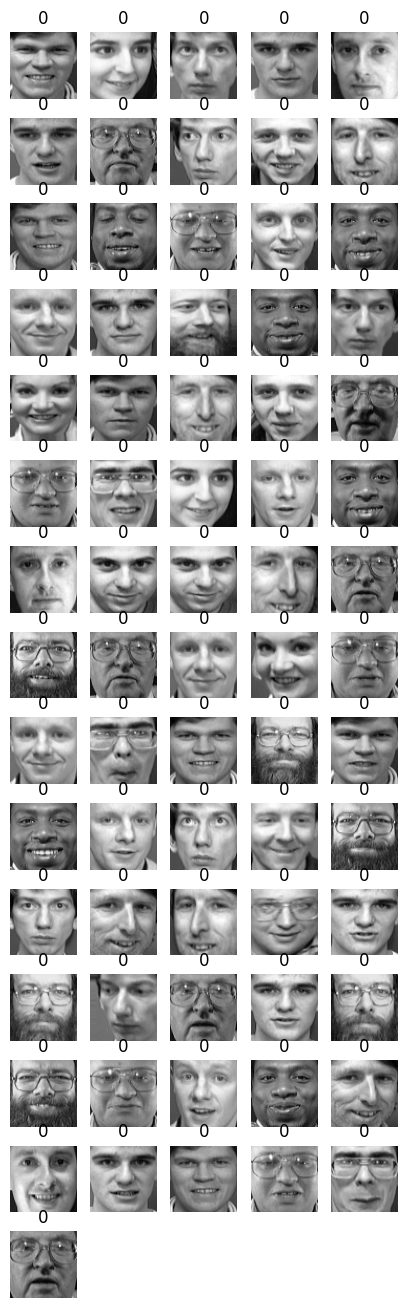

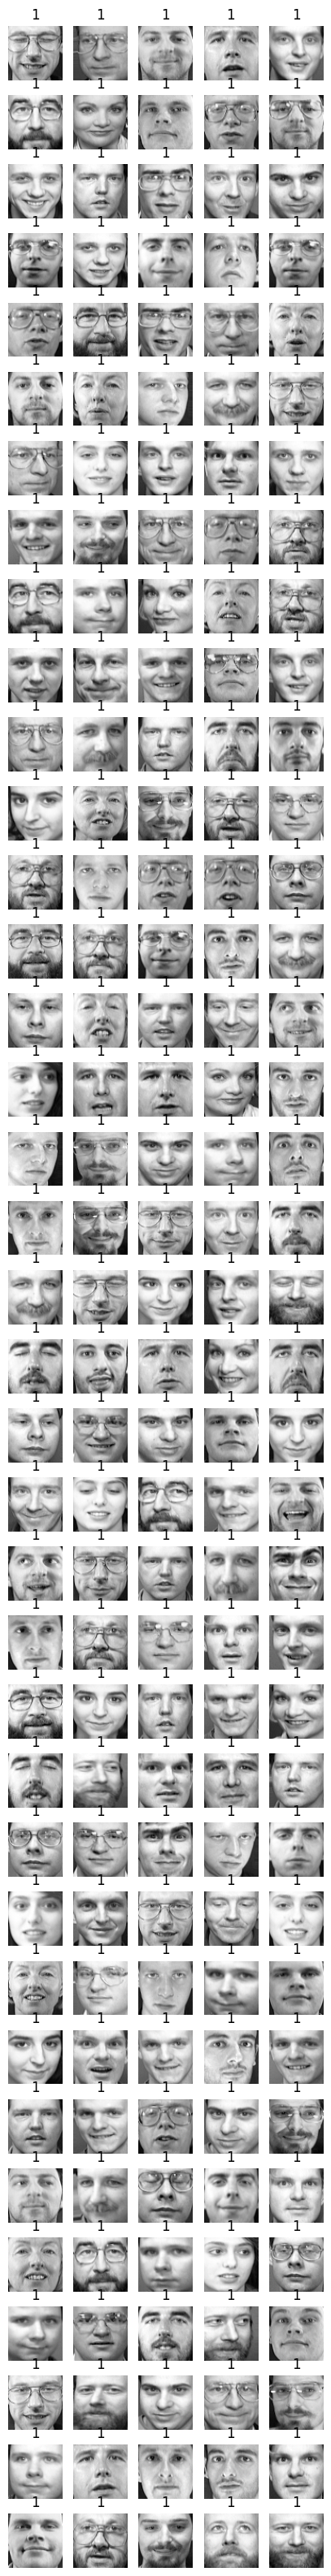

In [10]:
# 군집화된 이미지 시각화
plot_faces(X_train[cluster_labels == 0], cluster_labels[cluster_labels == 0])
plot_faces(X_train[cluster_labels == 1], cluster_labels[cluster_labels == 1])